<a href="https://colab.research.google.com/github/andysontran/2-CHL5230-F23/blob/main/KNN_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ethiopia.csv to ethiopia.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('ethiopia.csv')

In [4]:

y = df['Severity']

X= df.drop('Severity', axis=1)



In [5]:
# Import necessary libraries

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Import additional libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns



# A brief look into the dataset
print("Sample data:")
print(X[:5])  # Displaying first 5 rows of the data
print("\nCorresponding labels:")
print(y[:5])  # Displaying first 5 labels





Sample data:
   Age  Gender  Air Pollution  Alcohol Usage  Genetic Risk  Lung Disease  \
0   33       1              2              4             3             2   
1   17       1              3              1             4             2   
2   35       1              4              5             5             4   
3   37       1              7              7             6             7   
4   46       1              6              8             7             6   

   Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  
0        4        3               2           2                  4  
1        2        2               4           2                  3  
2        7        2               3           4                  8  
3        7        7               7           7                  8  
4        7        8               7           7                  9  

Corresponding labels:
0    0
1    1
2    2
3    2
4    2
Name: Severity, dtype: int64


In [6]:
# Split dataset into training set and test set
# We are reserving 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Choose a range of k values to test. In this case, we'll test values from 1 to 49.
k_values = range(1, 50)

# A list to keep track of the error rates for each k value.
errors = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)


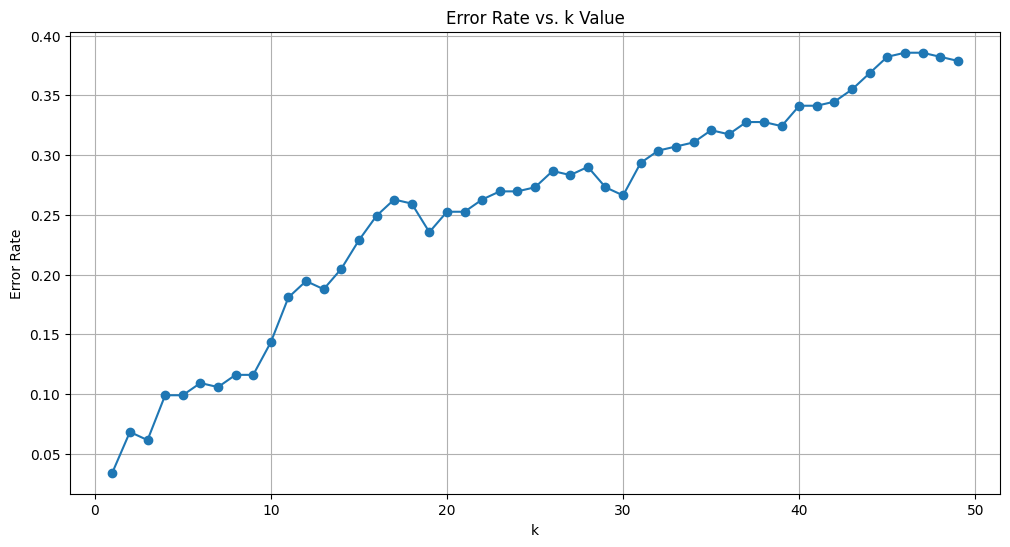

In [7]:
# Plotting
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Apply KNN

In [9]:
# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')   # Set K = 1 (lowest error rate)
knn.fit(X_train, y_train)

# Predict using test data
y_pred = knn.predict(X_test)

Evaluate the model

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[57  0  0  0]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 1  3  0 94]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.95      1.00      0.97        58
           2       1.00      1.00      1.00        80
           3       1.00      0.96      0.98        98

    accuracy                           0.99       293
   macro avg       0.98      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



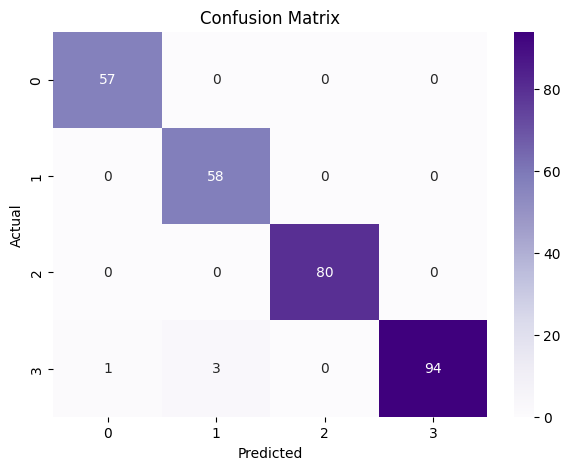

In [11]:
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature: 0, Score: 0.02099
Feature: 1, Score: 0.01604
Feature: 2, Score: 0.02918
Feature: 3, Score: 0.01212
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00392
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000


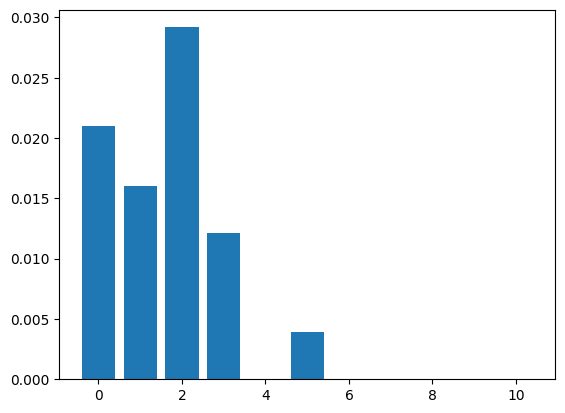

In [12]:
# Permutation feature importance with K-NN for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# Fit the model
results = permutation_importance(knn, X_train, y_train, scoring = 'accuracy')

importance = results.importances_mean

for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()